# Iris Dataset Analysis
[sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris#sklearn.datasets.load_iris)  
[_Iris_ flower data set - wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

target_names = []
for tar in y:
    if tar == 0:
        target_names.append('setosa')
    if tar == 1:
        target_names.append('versicolour')
    if tar == 2:
        target_names.append('virginica')

## Principal Components Analysis (PCA)
Followed example from [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris)  
[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

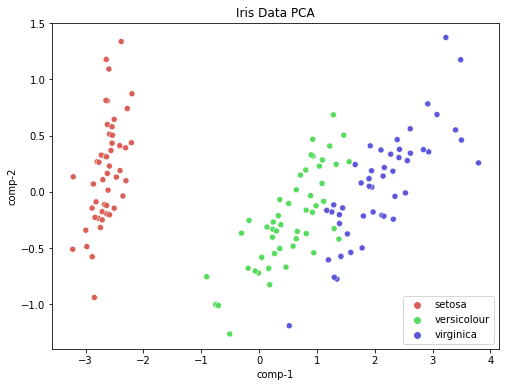

In [3]:
# Generate 3 components
X_reduced = PCA(n_components=3).fit_transform(X)

# Build Dataframe
df = pd.DataFrame()
df['comp-1'] = X_reduced[:,0]
df['comp-2'] = X_reduced[:,1]
df['comp-3'] = X_reduced[:,2]

# PCA Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    data=df,
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    ).set(title="Iris Data PCA")
plt.show()

## Multidimensional Scaling (MDS)
Followed example from [towardsdatascience.com](https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa)  
[sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=multidimensional%20scaling)

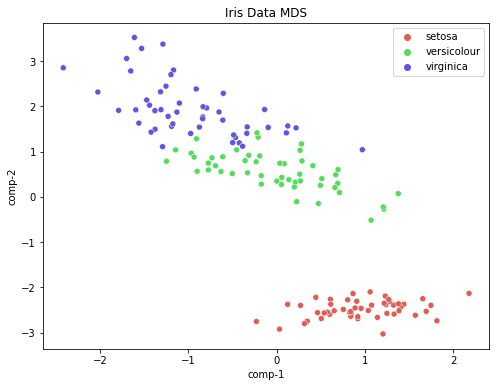

In [4]:
# Normalize Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Generate 2 Dimensional Dataset
embedding = MDS(n_components=2, random_state=0)
X_transformed = embedding.fit_transform(X)

# Build DataFrame
df = pd.DataFrame()
df['comp-1'] = X_transformed[:,0]
df['comp-2'] = X_transformed[:,1]

# MDS Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    data=df,
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    ).set(title="Iris Data MDS")
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)
Followed example from [datatechnotes.com](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)  
[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=multidimensional%20scaling)

/home/mbozada/projects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mbozada/projects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


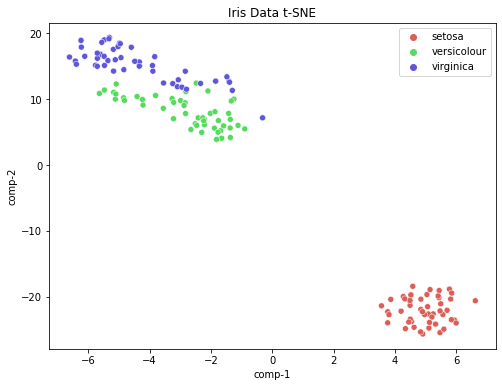

In [5]:
# Transform data
tsne = TSNE(n_components=2, random_state=314159)
X_transformed = tsne.fit_transform(X)

# Build DataFrame
df = pd.DataFrame()
df['comp-1'] = X_transformed[:,0]
df['comp-2'] = X_transformed[:,1]

# t-SNE Scatter Plot
plt.figure(figsize=[8,6])
sns.scatterplot(
    data=df,
    x="comp-1",
    y="comp-2",
    hue=target_names,
    palette=sns.color_palette("hls", 3),
    ).set(title="Iris Data t-SNE")
plt.show()